In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload your Kaggle API key

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sonijugal","key":"53d16a9019fcaeb556021e3599dca663"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir traffic_signs

In [ ]:
%cd traffic_signs/

/content/traffic_signs


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 610M/612M [00:08<00:00, 91.2MB/s]
100% 612M/612M [00:08<00:00, 77.1MB/s]


In [ ]:
!unzip /content/traffic_signs/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image 
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score, classification_report
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [ ]:
print(cur_path)

/content/traffic_signs


In [ ]:
# Iterates between 0 and 42 (43 classes)
for i in range(classes):
    
    # Path of each image
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    # Iterates between each image
    for a in images:
        # Try to load the images
        try:
            # Open the image
            image = Image.open(path + '/' + a)
            # Resizes the image to 30x30
            image = image.resize((30, 30))
            # Turns the image into an array
            image = np.array(image)
            # Append the image to "data" list
            data.append(image)
            # Append the label to "labels" list
            labels.append(i)
        # If it doesn't work, shows an error message
        except:
            print('Error loading images!')


In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
print('DATA SHAPE: ', data.shape)
print('LABELS SHAPE', labels.shape)

DATA SHAPE:  (39209, 30, 30, 3)
LABELS SHAPE (39209,)


In [ ]:
# 20% to train
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state=42)

print(X_train.shape,'|', X_test.shape,'|',y_train.shape,'|',y_test.shape)

# Use "to_categorical" method to convert the labels present in y_train and y_test into one-hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) | (7842, 30, 30, 3) | (31367,) | (7842,)


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
# 15 epochs
history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 140s 281ms/step - loss: 3.8761 - accuracy: 0.0511 - val_loss: 3.4805 - val_accuracy: 0.0534
Epoch 2/15
491/491 [==============================] - 138s 282ms/step - loss: 3.3215 - accuracy: 0.1119 - val_loss: 2.2616 - val_accuracy: 0.5019
Epoch 3/15
491/491 [==============================] - 138s 282ms/step - loss: 1.7243 - accuracy: 0.5292 - val_loss: 0.8600 - val_accuracy: 0.8176
Epoch 4/15
491/491 [==============================] - 141s 287ms/step - loss: 1.0723 - accuracy: 0.6904 - val_loss: 0.5134 - val_accuracy: 0.8817
Epoch 5/15
491/491 [==============================] - 141s 286ms/step - loss: 0.7053 - accuracy: 0.7965 - val_loss: 0.2631 - val_accuracy: 0.9343
Epoch 6/15
491/491 [==============================] - 140s 285ms/step - loss: 0.5042 - accuracy: 0.8549 - val_loss: 0.1770 - val_accuracy: 0.9513
Epoch 7/15
491/491 [==============================] - 141s 287ms/step - loss: 0.3786 - accuracy: 0.8940 - val_loss: 0.1088 -

In [ ]:
history.history

{'loss': [3.8761446475982666,
  3.321505546569824,
  1.724331021308899,
  1.0723069906234741,
  0.7052869200706482,
  0.5042216777801514,
  0.3785801827907562,
  0.3205743134021759,
  0.2914472818374634,
  0.24233217537403107,
  0.2516665756702423,
  0.2253868728876114,
  0.20591086149215698,
  0.2118084728717804,
  0.19118715822696686],
 'accuracy': [0.05107278376817703,
  0.11193292587995529,
  0.5291548371315002,
  0.6904070973396301,
  0.7964739799499512,
  0.8549430966377258,
  0.8939968943595886,
  0.9087576270103455,
  0.9184812307357788,
  0.9319667220115662,
  0.9288743138313293,
  0.9384703636169434,
  0.9418497085571289,
  0.9427423477172852,
  0.9458667039871216],
 'val_loss': [3.480524778366089,
  2.261552333831787,
  0.860011637210846,
  0.5134038329124451,
  0.26309648156166077,
  0.17701324820518494,
  0.10883649438619614,
  0.09559308737516403,
  0.07374017685651779,
  0.07728799432516098,
  0.05419827625155449,
  0.05720468983054161,
  0.05220063030719757,
  0.1003287

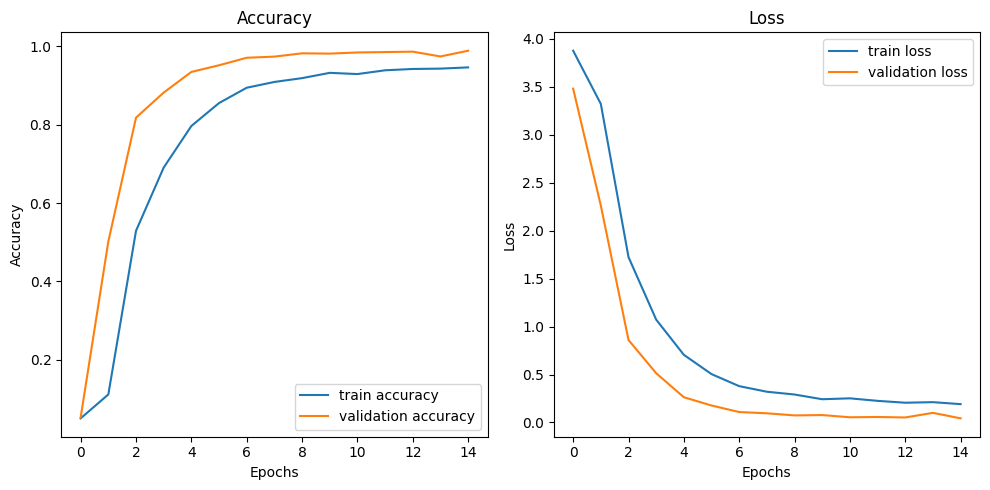

In [ ]:
# Figure size
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# Plot train and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
# Plot loss and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_test = pd.read_csv('/content/traffic_signs/Test.csv')
y_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
# Target
labels = y_test['ClassId'].values
# Test data path
current_path = '/content/traffic_signs/'
# Images path
imgs = current_path + y_test['Path'].values

# Store image data
data = []


for img in imgs:
    # Open image
    image = Image.open(img)
    # Resize to 30x30
    image = image.resize((30, 30))
    # Append in "data" list
    data.append(np.array(image))
    
# Convert "data" list to array
X_test = np.array(data)

# Make predictions
preds = np.argmax(model.predict(X_test), axis=-1)


# Evaluate model
print('ACCURACY: {} %'.format(round(accuracy_score(labels, preds) * 100, 3)))
print('R2_Score: {} %'.format(round(r2_score(labels, preds) * 100, 3)))
print(classification_report(labels, preds))

395/395 [==============================] - 13s 32ms/step
ACCURACY: 95.859 %
R2_Score: 95.14 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.94      0.99      0.96       720
           2       0.98      0.98      0.98       750
           3       0.97      0.96      0.96       450
           4       0.98      0.97      0.97       660
           5       0.91      0.98      0.95       630
           6       0.99      0.81      0.89       150
           7       1.00      0.96      0.98       450
           8       0.99      0.97      0.98       450
           9       0.96      0.99      0.98       480
          10       1.00      0.98      0.99       660
          11       0.94      0.98      0.96       420
          12       0.99      0.98      0.99       690
          13       0.99      0.99      0.99       720
          14       0.94      0.99      0.96       270
          15       0.97      0.98      0.

In [ ]:
model.save('traffic_classifier.h5')
from google.colab import files
files.download('traffic_classifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>